#Import bibliotek

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model as plot_model
import matplotlib.pyplot as plt

#Pobranie danych - CIFAR-10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

#Normalizacja danych

In [ ]:
train_images = (train_images / 255)
test_images = (test_images / 255)

In [ ]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
#32^2*3
#train_images = train_images.reshape((-1, 3072))
#test_images = test_images.reshape((-1, 3072))
#print(train_images.shape)

#Przygotowanie architektury modelu sieci

In [ ]:
#utworzenie modelu naszej sieci
model = Sequential([
  Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, (3, 3), padding='same', activation='relu'),
  Conv2D(32, (3, 3), padding='same', activation='relu'),
  Conv2D(8, (3, 3), padding='same', activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax'), 
])

In [ ]:
#dodanie do niej algorytmów optymalizacynych i funkcji strat
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

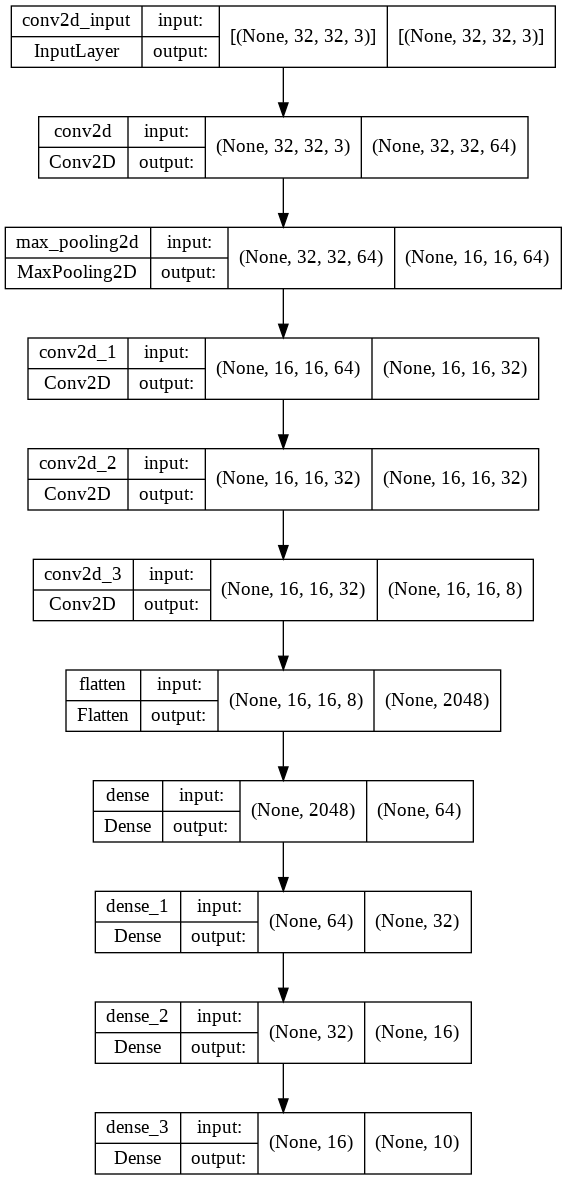

In [ ]:
plot_model(model, to_file="model.png", show_shapes=True)

##Trenowanie

In [ ]:
history = model.fit(
    train_images, 
    to_categorical(train_labels), 
    batch_size=32, 
    epochs=25
)

Epoch 1/10
1563/1563 [==============================] - 170s 108ms/step - loss: 0.6309 - accuracy: 0.7762
Epoch 2/10
1563/1563 [==============================] - 161s 103ms/step - loss: 0.5961 - accuracy: 0.7881
Epoch 3/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.5612 - accuracy: 0.8005
Epoch 4/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.5312 - accuracy: 0.8117
Epoch 5/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.4990 - accuracy: 0.8230
Epoch 6/10
1563/1563 [==============================] - 160s 103ms/step - loss: 0.4672 - accuracy: 0.8339
Epoch 7/10
1563/1563 [==============================] - 161s 103ms/step - loss: 0.4409 - accuracy: 0.8442
Epoch 8/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.4256 - accuracy: 0.8493
Epoch 9/10
1563/1563 [==============================] - 161s 103ms/step - loss: 0.3987 - accuracy: 0.8589
Epoch 10/10
1563/1563 [=======================

##Wykres funkcji strat

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


###Wykres dokładności modelu podczas treningu

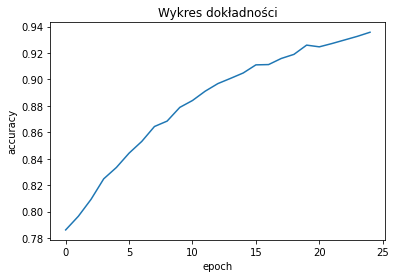

In [24]:
plt.plot(history.history['accuracy'])
plt.title('Wykres dokładności')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

###Wykres funkcji strat podczas treningu

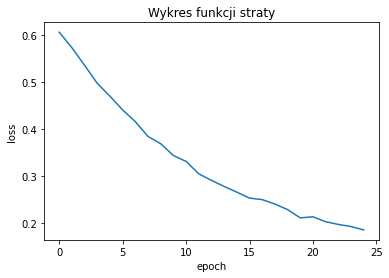

In [25]:
plt.plot(history.history['loss'])
plt.title('Wykres funkcji straty')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Przy 10 epokach model ledwo osiągał 77% dokładności

#Ewaluacja modelu

In [26]:
test_loss, test_acc = model.evaluate(test_images, to_categorical(test_labels))

313/313 [==============================] - 1s 4ms/step - loss: 2.3037 - accuracy: 0.6146


#Predykcja dla danych testowych

In [27]:
y_pred = model.predict(test_images)

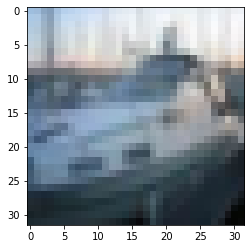

ship


In [44]:
i = 2
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()
print(class_names[np.argmax(y_pred[i])])